In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/Dataset-Unicauca-Version2-87Atts.csv')

In [ ]:
numerical_features = ['Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
                      'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
                      'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
                      'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
                      'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
                      'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min',
                      'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min',
                      'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
                      'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
                      'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
                      'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count', 'URG.Flag.Count',
                      'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio', 'Average.Packet.Size', 'Avg.Fwd.Segment.Size',
                      'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1', 'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk',
                      'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
                      'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes',
                      'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
                      'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean', 'Idle.Std', 'Idle.Max',
                      'Idle.Min']

In [ ]:
categorical_features = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol']

X_numerical = df[numerical_features].values
X_categorical = df[categorical_features].values

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_numerical = imputer.fit_transform(X_numerical)

In [ ]:
label_encoders = {}
for i, feature in enumerate(categorical_features):
    label_encoders[feature] = LabelEncoder()
    X_categorical[:, i] = label_encoders[feature].fit_transform(X_categorical[:, i])

In [ ]:
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)

In [ ]:
X = np.hstack((X_numerical, X_categorical))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [ ]:
clf_if = IsolationForest(contamination=0.01)
clf_if.fit(X)
y_pred_if = clf_if.predict(X)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans



# Isolation Forest

In [ ]:
clf_if = IsolationForest(contamination=0.01)
clf_if.fit(X)
y_pred_if = clf_if.predict(X)


# k-means Clustering

In [ ]:
clf_kmeans = KMeans(n_clusters=2)
clf_kmeans.fit(X)
y_pred_kmeans = clf_kmeans.predict(X)
y_pred_kmeans[y_pred_kmeans == 1] = 0
y_pred_kmeans[y_pred_kmeans == -1] = 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


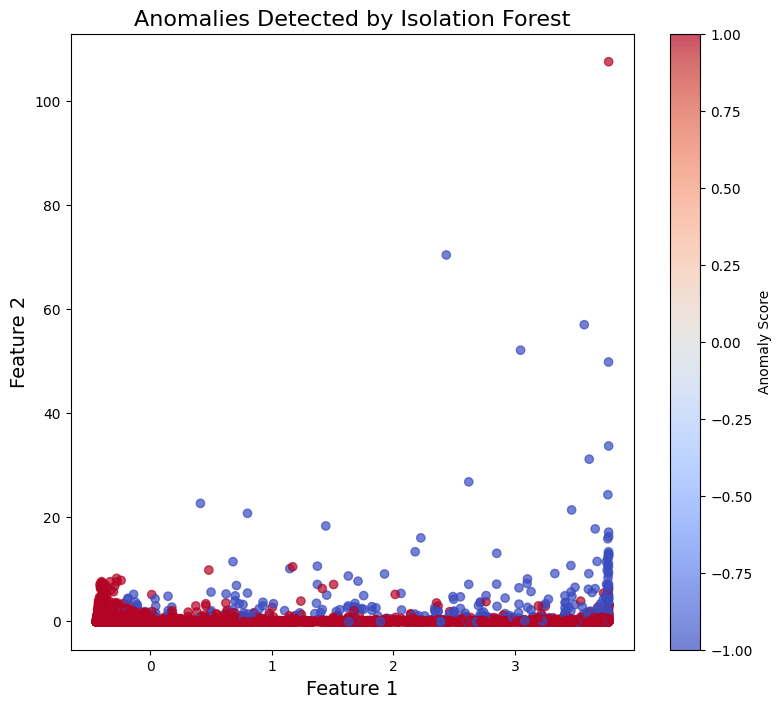

In [ ]:
plt.figure(figsize=(20, 8))

# Anomalies Detected by Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_if, cmap='coolwarm', alpha=0.7)
plt.title('Anomalies Detected by Isolation Forest', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.colorbar(label='Anomaly Score')

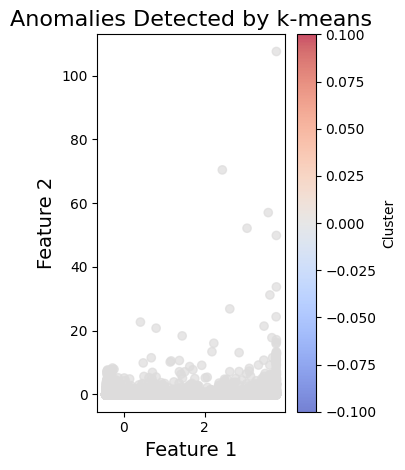

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, cmap='coolwarm', alpha=0.7)
plt.title('Anomalies Detected by k-means', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [ ]:
def plot_feature_distribution(features, y_pred, title):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(7, 4, i + 1)
        sns.histplot(X[:, i][y_pred == 1], kde=True, color='red', bins=30)
        sns.histplot(X[:, i][y_pred == 0], kde=True, color='blue', bins=30)
        plt.title(feature)
        plt.xlabel('')
        plt.ylabel('')
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Selecting top 28 features for detailed analysis

In [ ]:
top_features = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration',
                'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
                'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
                'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std',
                'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
                'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std']

# Plotting detailed feature distributions for anomalies detected by Isolation Forest

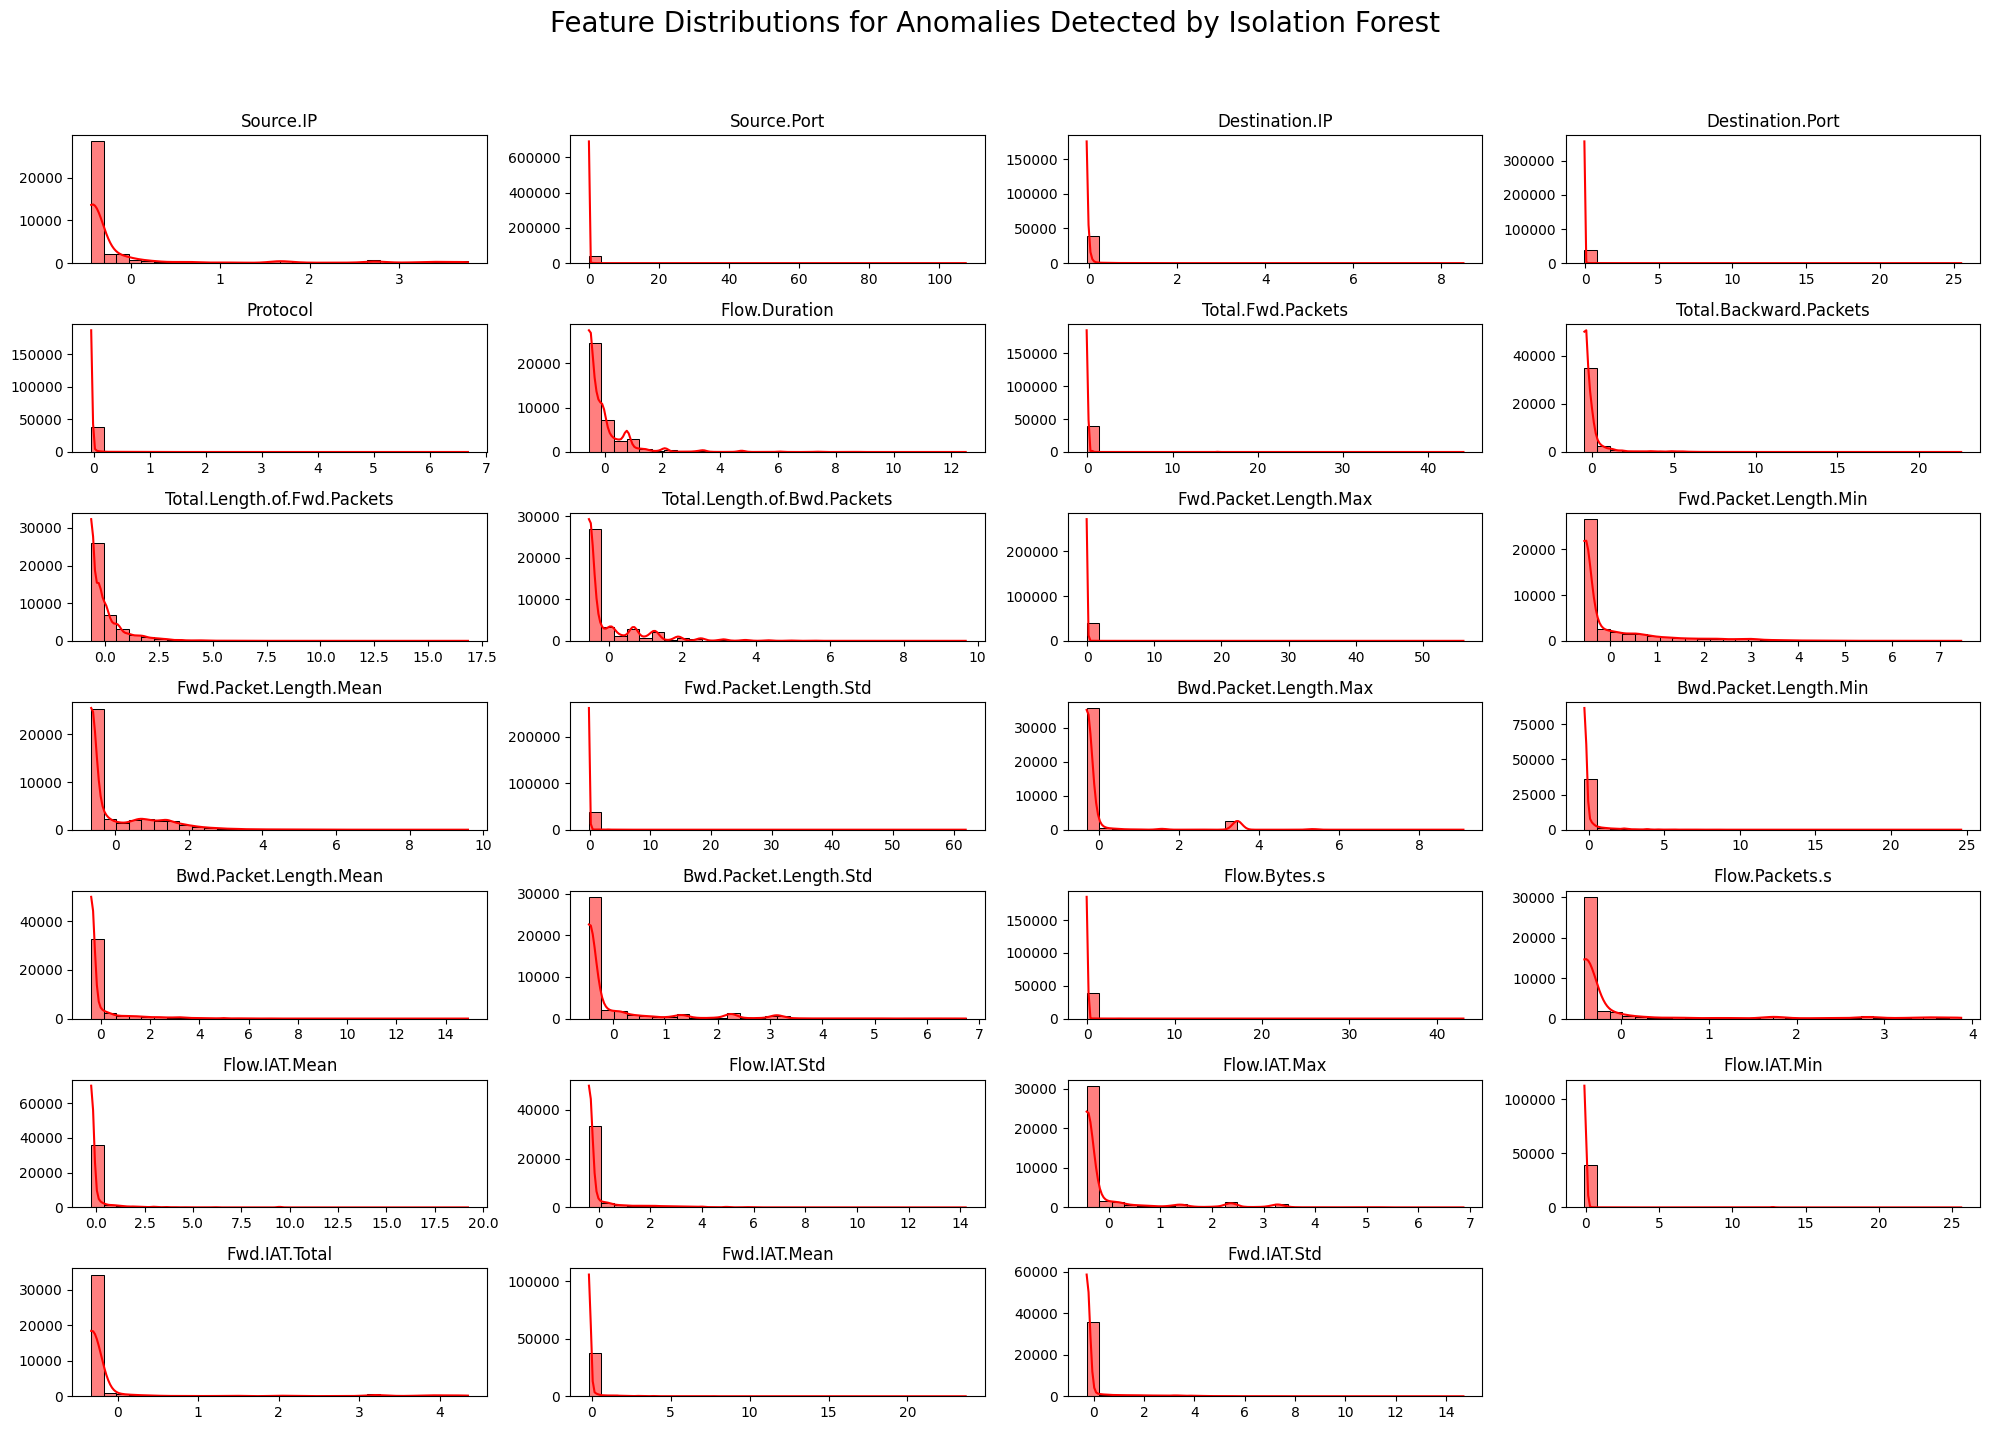

In [ ]:
plot_feature_distribution(top_features, y_pred_if, 'Feature Distributions for Anomalies Detected by Isolation Forest')

# Plotting detailed feature distributions for anomalies detected by k-means

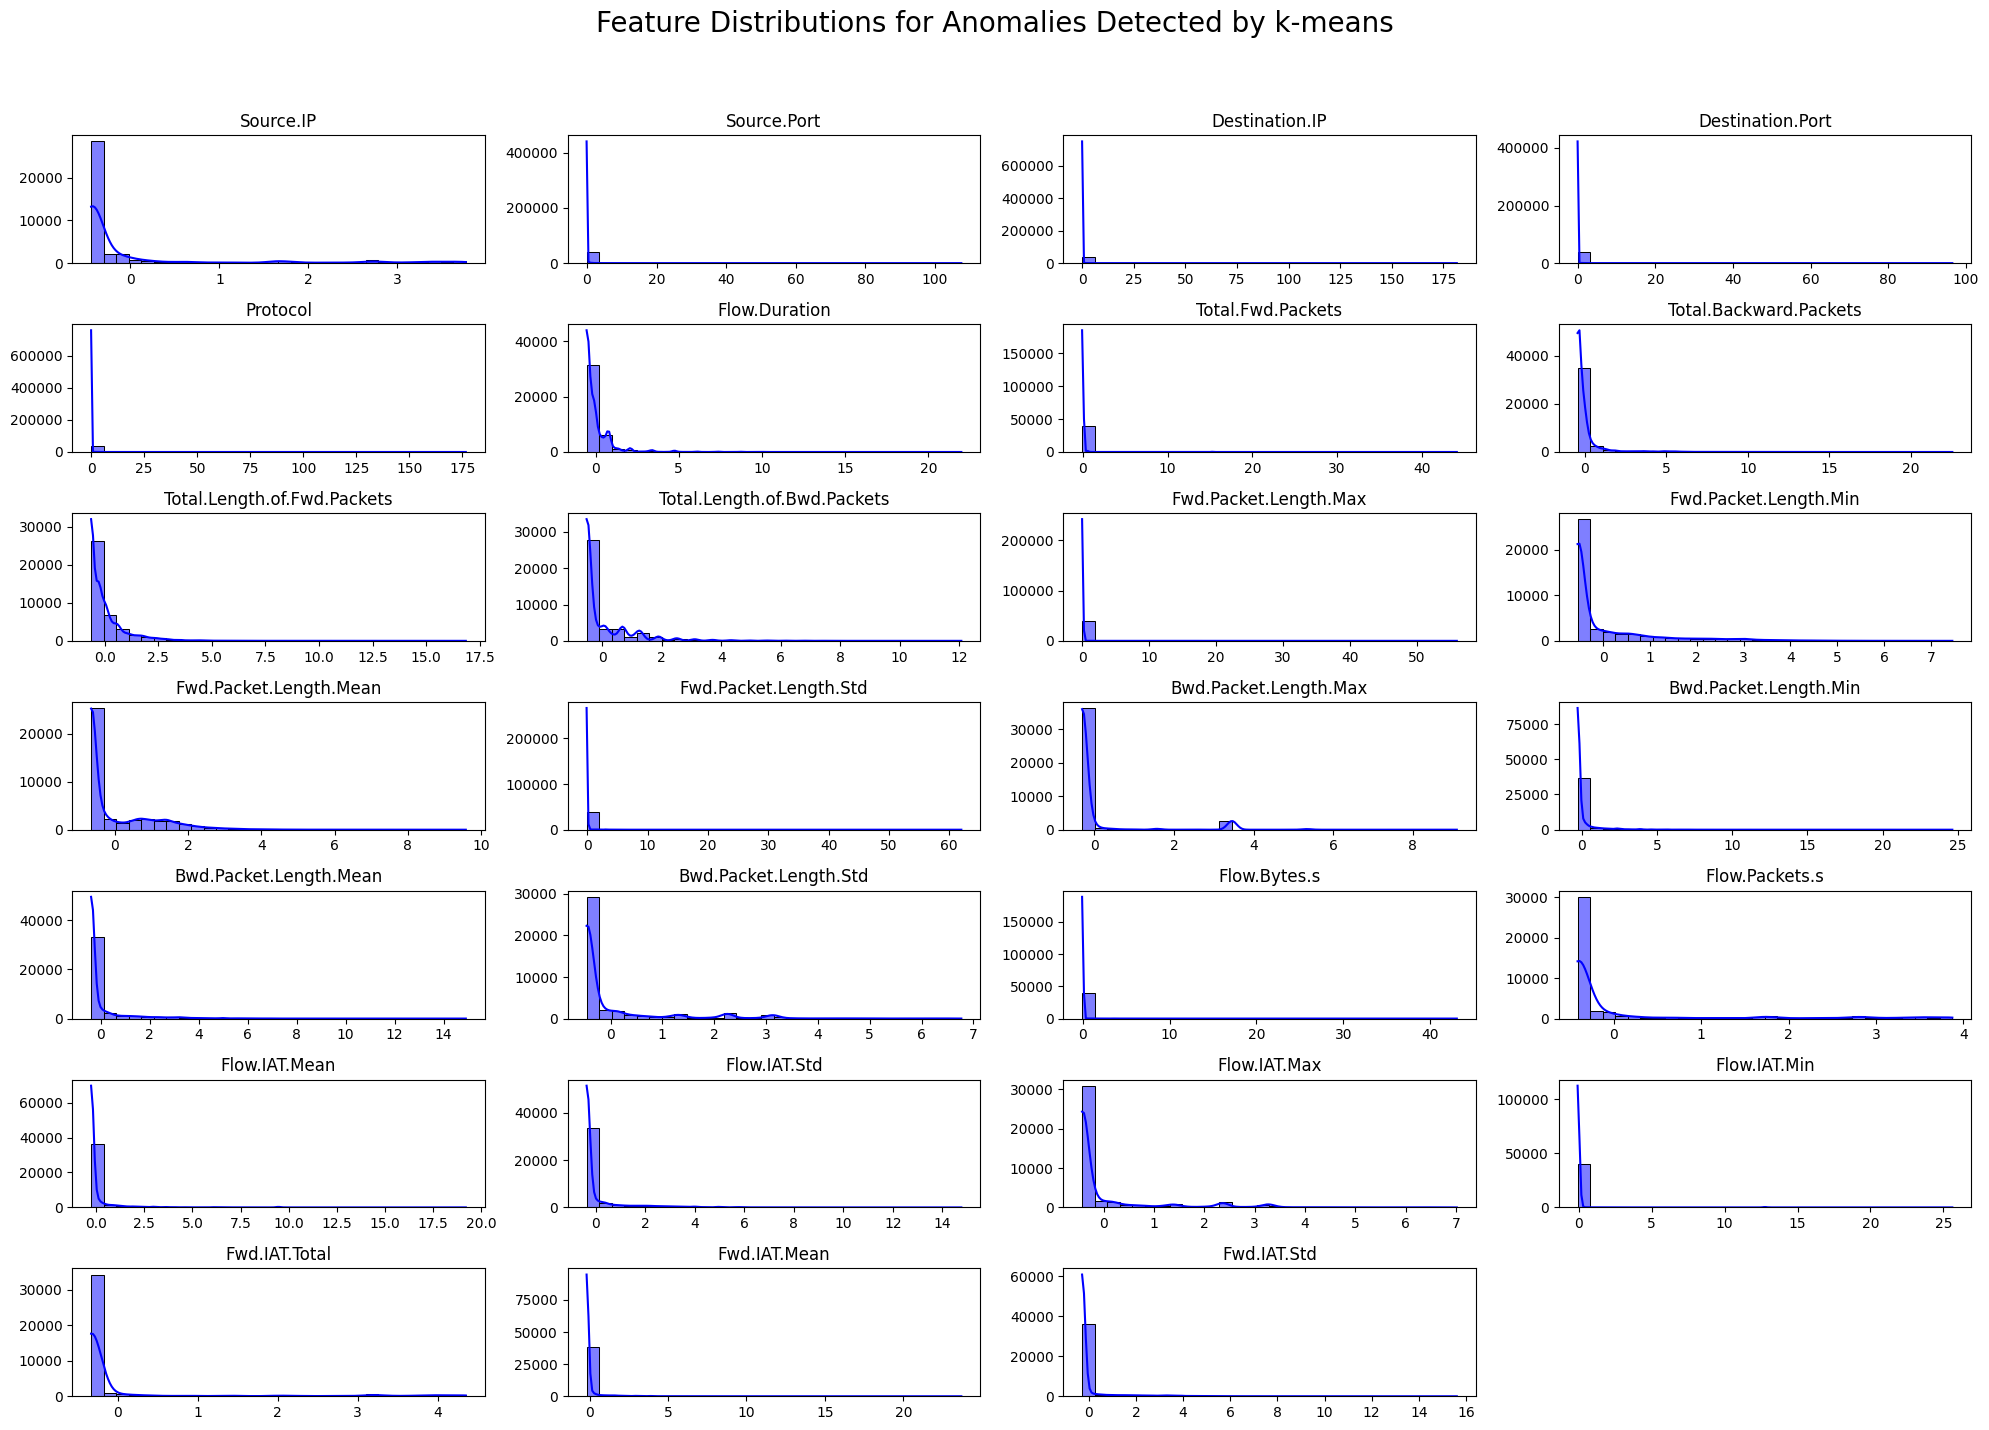

In [ ]:
plot_feature_distribution(top_features, y_pred_kmeans, 'Feature Distributions for Anomalies Detected by k-means')